In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel(r'Ecom.xlsx')

In [3]:
data.shape 

(537979, 12)

In [4]:
data.head(10)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN
5,4349.0,14618,397122,2017-10-27,1,12:43:00,256.0,256.0,Location 1,NaN,NaN,NaN
6,4343.0,15364,368432,2017-02-13,-4,14:46:00,922.0,-3688.0,Location 1,1.0,NaN,NaN
7,4341.0,85014B,377109,2017-05-14,3,09:22:00,677.0,2031.0,Location 1,NaN,NaN,NaN
8,4341.0,85014A,377109,2017-05-12,3,09:22:00,692.0,2076.0,Location 1,NaN,NaN,NaN
9,4341.0,85014B,390217,2017-09-07,6,14:47:00,670.0,4020.0,Location 1,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
data.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [7]:
data=data.dropna(subset=['CustomerID'])

In [8]:
#data cleaning
data.loc[data.duplicated(),:]

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN


In [9]:
data=data.drop_duplicates(ignore_index=True)

In [10]:
# to drop null value column
data=data.iloc[:,0:9]

In [11]:
#to convert date
data['Date']=pd.to_datetime(data['Date of purchase'])

In [12]:
data.tail(10)
#to find latest date
max(data['Date'])

Timestamp('2017-12-19 00:00:00')

In [13]:
import datetime as dt
Latest_Date=dt.datetime(2017,12,20)
data['Date1']=data['Date']

In [14]:
data.head(4)

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Date,Date1
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,2017-10-29,2017-10-29
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,2017-10-05,2017-10-05
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,2017-10-12,2017-10-12
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,2017-08-22,2017-08-22


In [15]:
#Create RMF Model
RMFScore=data.groupby('CustomerID').agg({'Date1':lambda x:(Latest_Date-x.max()).days,'Date':lambda x:x.nunique(),'Price':lambda x:x.sum()})

In [16]:
RMFScore['Date']=RMFScore['Date'].astype(int)

In [17]:
RMFScore.rename(columns={'Date1':"Recency",'Date':"Frequncy",'Price':"Monetray"},inplace=True)

In [18]:
RMFScore.reset_index().head()

,CustomerID,Recency,Frequncy,Monetray
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,19,10,176613.0
3,5.0,311,7,41976.0
4,6.0,37,42,151822.0


In [19]:
#EDA Part
RMFScore.Recency.describe()
#Split the data into 4 segments based on quantiles
quantiles=RMFScore.quantile(q=[0.25,0.50,0.75])
quantiles=quantiles.to_dict()

In [20]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequncy': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetray': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [21]:
#Create function for recency , frequency and monetary rating
def RScoring(x,p,d):
    
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [22]:
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

In [23]:
RMFScore.head()

,Recency,Frequncy,Monetray
CustomerID,,,
2.0,4,63,553704.0
3.0,77,18,257404.0
4.0,19,10,176613.0
5.0,311,7,41976.0
6.0,37,42,151822.0


In [24]:
RMFScore['R']=RMFScore['Recency'].apply(RScoring,args=('Recency',quantiles, ))

In [25]:
RMFScore['F']=RMFScore['Frequncy'].apply(FnMScoring,args=('Frequncy',quantiles, ))

In [26]:
RMFScore['M']=RMFScore['Monetray'].apply(FnMScoring,args=('Monetray',quantiles, ))

In [27]:
RMFScore.head()

,Recency,Frequncy,Monetray,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,3,2,1
4.0,19,10,176613.0,2,3,2
5.0,311,7,41976.0,4,4,3
6.0,37,42,151822.0,2,1,2


In [28]:
RMFScore['RFMGroup']=RMFScore.R.map(str)+RMFScore.F.map(str)+RMFScore.M.map(str)

In [29]:
Loyal_level=['Diamond','Platinum','Gold','Silver']

In [30]:
RMFScore['RFMGroup']=RMFScore['RFMGroup'].astype(float)

In [31]:
score_cuts=pd.qcut(RMFScore.RFMGroup,q=4,labels=Loyal_level)

In [32]:
RMFScore['RFM_Loyal_level']=score_cuts.values

In [33]:
RMFScore.reset_index().head()

,CustomerID,Recency,Frequncy,Monetray,R,F,M,RFMGroup,RFM_Loyal_level
0,2.0,4,63,553704.0,1,1,1,111.0,Diamond
1,3.0,77,18,257404.0,3,2,1,321.0,Gold
2,4.0,19,10,176613.0,2,3,2,232.0,Platinum
3,5.0,311,7,41976.0,4,4,3,443.0,Silver
4,6.0,37,42,151822.0,2,1,2,212.0,Platinum


In [34]:
RMFScore[RMFScore['RFMGroup']=='111'].sort_values('Frequncy',ascending='False').reset_index().head(20)

,CustomerID,Recency,Frequncy,Monetray,R,F,M,RFMGroup,RFM_Loyal_level


In [35]:
def handle_neg_n_zero(num):
    if num<=0:
        return 1
    else:
        return num

In [36]:
RMFScore

,Recency,Frequncy,Monetray,R,F,M,RFMGroup,RFM_Loyal_level
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111.0,Diamond
3.0,77,18,257404.0,3,2,1,321.0,Gold
4.0,19,10,176613.0,2,3,2,232.0,Platinum
5.0,311,7,41976.0,4,4,3,443.0,Silver
6.0,37,42,151822.0,2,1,2,212.0,Platinum
...,...,...,...,...,...,...,...,...
4368.0,278,7,20480.0,4,4,4,444.0,Silver
4369.0,181,6,10774.0,4,4,4,444.0,Silver
4370.0,9,11,24962.0,1,3,4,134.0,Diamond


In [37]:
# Frequency and recency will not be negative 
RMFScore['Monetray']=[handle_neg_n_zero(x) for x in RMFScore.Monetray]


In [38]:
RMFScore.head(50)

,Recency,Frequncy,Monetray,R,F,M,RFMGroup,RFM_Loyal_level
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111.0,Diamond
3.0,77,18,257404.0,3,2,1,321.0,Gold
4.0,19,10,176613.0,2,3,2,232.0,Platinum
5.0,311,7,41976.0,4,4,3,443.0,Silver
6.0,37,42,151822.0,2,1,2,212.0,Platinum
7.0,208,4,9410.0,4,4,4,444.0,Silver
8.0,233,10,135550.0,4,3,2,432.0,Silver
9.0,215,7,65832.0,4,4,3,443.0,Silver
10.0,25,22,331601.0,2,2,1,221.0,Platinum


<AxesSubplot:ylabel='Monetray'>

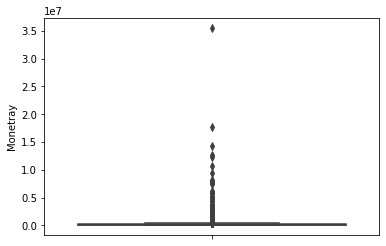

In [39]:
# To check outlier
sns.boxplot(y='Monetray',data=RMFScore)

In [40]:
#As outlier is present we need to do standard scaling
from sklearn.preprocessing import StandardScaler
scalobj=StandardScaler()
newdata=RMFScore[['Recency','Frequncy','Monetray']]
scaled_data=scalobj.fit_transform(newdata)

In [41]:
newdata.head(39)

,Recency,Frequncy,Monetray
CustomerID,,,
2.0,4,63,553704.0
3.0,77,18,257404.0
4.0,19,10,176613.0
5.0,311,7,41976.0
6.0,37,42,151822.0
7.0,208,4,9410.0
8.0,233,10,135550.0
9.0,215,7,65832.0
10.0,25,22,331601.0


In [42]:
scaled_data

array([[-0.88687668,  1.05990701,  0.37766904],
       [-0.16187726, -0.27973676,  0.03198725],
       [-0.73790419, -0.51789565, -0.0622685 ],
       ...,
       [-0.83721918, -0.48812579, -0.23919388],
       [-0.88687668,  3.11402747,  0.05905846],
       [-0.48961672, -0.13088745,  0.03830589]])

In [43]:
scaled_data=pd.DataFrame(scaled_data,index=RMFScore.index,columns=newdata.columns)

In [53]:
#Building the model
from sklearn.cluster import KMeans
sum_of_sq_dist={}
for k in range (1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=300)
    km=km.fit(scaled_data)
    sum_of_sq_dist[k]=km.inertia_

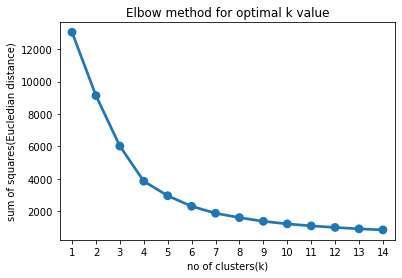

In [56]:
#Visualisation for elbow method
sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel("no of clusters(k)")
plt.ylabel("sum of squares(Eucledian distance)")
plt.title("Elbow method for optimal k value")
plt.show()


In [60]:
KM=KMeans(n_clusters=4,init='k-means++',max_iter=300)
y_kmeans=KM.fit_predict(scaled_data)
RMFScore['cluster']=KM.labels_
RMFScore.tail(40)

,Recency,Frequncy,Monetray,R,F,M,RFMGroup,RFM_Loyal_level,cluster
CustomerID,,,,,,,,,
4333.0,193,39,244230.0,4,1,1,411.0,Silver,0
4334.0,84,25,73258.0,3,2,3,323.0,Gold,1
4335.0,334,1,44172.0,4,4,3,443.0,Silver,0
4336.0,72,27,259102.0,3,2,1,321.0,Gold,1
4337.0,31,35,107479.0,2,1,2,212.0,Platinum,1
4338.0,3,33,131110.0,1,2,2,122.0,Diamond,1
4339.0,219,35,201305.0,4,1,2,412.0,Silver,0
4340.0,49,5,51618.0,2,4,3,243.0,Platinum,1
4341.0,11,63,254672.0,1,1,1,111.0,Diamond,1


In [62]:
#Uploading data 
RMFScore.to_excel('RMFScore.xlsx')
os.getcwd()


'C:\\Users\\Mythri\\abc'

SyntaxError: invalid syntax (<ipython-input-63-6c1eec6c6423>, line 1)